In [1]:
import pandas as pd

In [2]:
base = "../data"

In [3]:
df = pd.read_csv(f"{base}/train_preprocessed.csv")
df.sample(3)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
129699,would be shown exactly as periyar wished,b5c8ab747747a177,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
63202,where are her unreleased songs the songs smas...,a92360debbfb6e6c,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
65183,wikiproject red hot chili peppers newsletter ...,ae63100b520c06ad,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [4]:
df.shape

(159571, 10)

In [5]:
df_ = pd.read_csv(f"{base}/test_preprocessed.csv")
df = pd.concat([df, df_])
df.shape

(312735, 10)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'class')

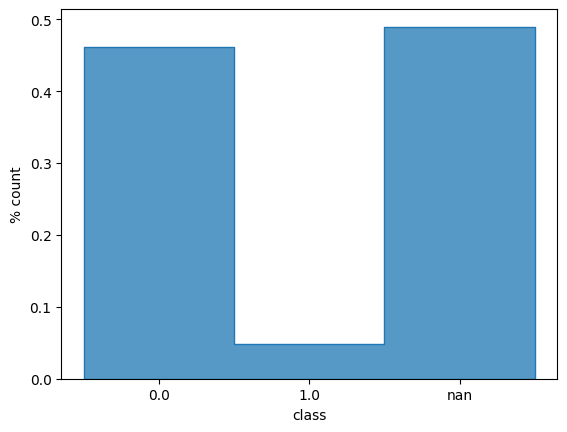

In [6]:
df_copy = df.copy()
df_copy['toxic'] = df_copy['toxic'].astype('str')

sns.histplot(
    data=df_copy,
    x='toxic',
    element="step",
    stat='density',
    common_norm=False
)

plt.ylabel('% count')
plt.xlabel('class')

In [7]:
df2 = pd.read_csv(f"{base}/youtoxic_english_1000.csv")
df2.sample(3)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
579,Ughj2Fv5cGqJX3gCoAEC,cT14IbTDW2c,The protesters look like kids (16-22?) I won...,False,False,False,False,False,False,False,False,False,False,False,False
518,Ugjw4pEB_XxsF3gCoAEC,9pr1oE34bIM,It's amazing the ONLY info on the police offic...,False,False,False,False,False,False,False,False,False,False,False,False
171,UgzrlizM92NKM2eGpvl4AaABAg,04kJtp6pVXI,Masri is unemployed,True,True,False,True,False,False,False,False,False,False,False,False


Text(0.5, 0, 'class')

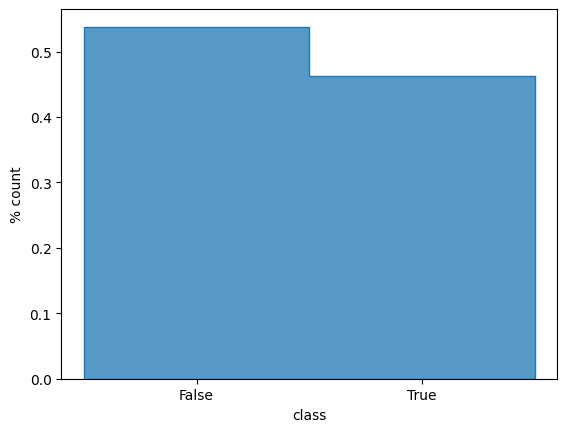

In [8]:
df2_copy = df2.copy()
df2_copy['IsToxic'] = df2_copy['IsToxic'].astype('str')

sns.histplot(
    data=df2_copy,
    x='IsToxic',
    element="step",
    stat='density',
    common_norm=False
)

plt.ylabel('% count')
plt.xlabel('class')

Будем заниматься бинарной классификацией для предсказанания целевой переменной isToxic. В качестве метрики используем *f1-score*

In [3]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def show_model_perfection_metrics(y_test, y_pred):
    print(f"F1: {f1_score(y_test, y_pred, average='weighted'):.10}")

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.show()

Проведём лемматизацию данных

In [4]:
import sys, os.path
utils = (os.path.abspath(os.path.join(os.path.dirname(''), '..'))
+ '/utils')
sys.path.append(utils) # to make all utils files importable

In [11]:
from text_refactorer import refactor_data

In [12]:
df[df['comment_text'].isna()]

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
506,NaN,00d2aca8d65aa590,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
10573,NaN,11b30d2a67102880,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
10988,NaN,1272c25ed799c527,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
28247,NaN,2efe67facf334be4,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
45000,NaN,4aa56610aade012e,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
55331,NaN,5c08635f8401e98e,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
74006,NaN,7b4951508a68fc00,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
82830,NaN,8a21d8383a4b41b8,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
104010,NaN,ad968d3ec5bac5c2,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN
110976,NaN,b92178ef605b594a,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN


In [13]:
df.dropna(subset=['comment_text', 'toxic'], inplace=True)

In [14]:
df_lemmatized = df.copy()
df_lemmatized['text'] = refactor_data(df_lemmatized['comment_text'])
df_lemmatized.sample(3)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity,text
148953,the times atlas of world history suggests th...,549808e7a817ed68,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0,time atlas world history suggest picture end c...
89675,flan etc hi thanks for contributing to the c...,efe66c3a93b3c3ef,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0,flan etc hi thank contribute cr caramel articl...
80322,because he got a ms from milwaukee,d6e2865613cd9aa0,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0,get milwaukee


In [15]:
df_lemmatized.toxic.value_counts()

toxic
0.0    144277
1.0     15294
Name: count, dtype: int64

In [16]:
df2_lemmatized = df2.copy()
df2_lemmatized['text'] = refactor_data(df2_lemmatized['Text'])
df2_lemmatized.sample(3)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,text
512,UgjtqUBN4nZlJ3gCoAEC,9pr1oE34bIM,When did coming towards the officer is the sam...,False,False,False,False,False,False,False,False,False,False,False,False,come towards officer thing charge officer pers...
420,UgikjrljA1NcWXgCoAEC,9pr1oE34bIM,Thank you +Stefan Molyneux for sharing your l...,False,False,False,False,False,False,False,False,False,False,False,False,thank stefan molyneux share logical rational e...
780,Ugi2mKmoNhVvB3gCoAEC,dG7mZQvaQDk,hit the nail on the head !! black lives matter...,False,False,False,False,False,False,False,False,False,False,False,False,hit nail head black live matter guess keep kil...


In [17]:
df2_lemmatized['toxic'] = df2_lemmatized['IsToxic']

In [18]:
df2_lemmatized['toxic'].isna().sum()

0

## Обучение моделей (бэйзлайн)

In [19]:
cols = ['toxic', 'text']
df_prepared = pd.concat([df_lemmatized[cols], df2_lemmatized[cols]])

In [42]:
df_prepared.text.isna().sum()

0

In [43]:
prep = f"{base}/prepared.csv"
df_prepared.to_csv(prep,index=False)

In [5]:
prep = f"{base}/prepared.csv"
# num_samles = 2000
# df_small = pd.read_csv(prep).sample(num_samles)
df_small = pd.read_csv(prep)

In [6]:
df_small.dropna(subset=['text'], inplace=True)

In [7]:
df_small.sample()

,toxic,text
156092,0.0,get message whatnot user snitch b cry make min...


In [8]:
X, y = df_small['text'], df_small['toxic']

In [9]:
X.isna().sum()

0

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(X).toarray()

In [12]:
X.shape

(160511, 4000)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [26]:
clf = RandomForestClassifier(n_estimators=1000, random_state=RANDOM_STATE, n_jobs=-14)
lr = LogisticRegression(random_state=RANDOM_STATE, n_jobs=14)
cb = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0, task_type='GPU')

In [27]:
models = {'LogisticRegression': lr, 'CatBoostClassifier': cb}

In [28]:
def fit_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    show_model_perfection_metrics(y_pred=y_pred, y_test=y_test)

training model LogisticRegression
F1: 0.9536486282


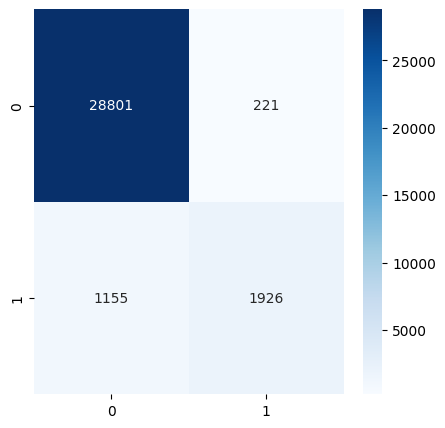

training model CatBoostClassifier
F1: 0.9473941308


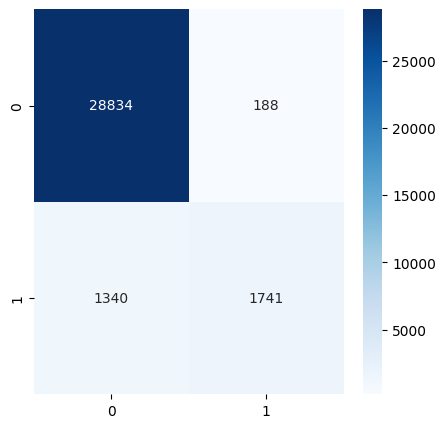

training model RandomForestClassifier


KeyboardInterrupt: 

In [29]:
%%time

for name, model in models.i tems():
    print(f"training model {name}")
    fit_predict(model, X_train, X_test, y_train, y_test)

In [30]:
import pickle

model_base = f"{base}/../models"

with open(f"{model_base}/tfidf.pkl", 'wb') as f:
    pickle.dump(tfidf, f)
# with open(f"{model_base}/rfc.pkl", 'wb') as f:
#     pickle.dump(clf, f)
with open(f"{model_base}/lr.pkl", 'wb') as f:
    pickle.dump(lr, f)
with open(f"{model_base}/cb.pkl", 'wb') as f:
    pickle.dump(cb, f)
    

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, Dense

In [35]:
max_features = 20000
embedding_dim = 128
sequence_length = 500

model = Sequential([
    Embedding(max_features, embedding_dim, input_length=X_train.shape[1]),
    Dropout(0.5),

    Conv1D(embedding_dim, 7, activation='relu', padding='valid', strides=3),
    Conv1D(embedding_dim, 7, activation='relu', padding='valid', strides=3),
    GlobalMaxPooling1D(),

    Dense(embedding_dim, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid', name='predictions')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

e:\Projects\HSE\HSE_ML_SP2024\Env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
epochs = 5

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
4013/4013 ━━━━━━━━━━━━━━━━━━━━ 700s 174ms/step - accuracy: 0.8994 - loss: 0.3367 - val_accuracy: 0.9040 - val_loss: 0.3165
Epoch 2/5
4013/4013 ━━━━━━━━━━━━━━━━━━━━ 701s 175ms/step - accuracy: 0.9015 - loss: 0.3254 - val_accuracy: 0.9040 - val_loss: 0.3162
Epoch 3/5
4013/4013 ━━━━━━━━━━━━━━━━━━━━ 690s 172ms/step - accuracy: 0.9020 - loss: 0.3232 - val_accuracy: 0.9040 - val_loss: 0.3174
Epoch 4/5
4013/4013 ━━━━━━━━━━━━━━━━━━━━ 691s 172ms/step - accuracy: 0.9023 - loss: 0.3224 - val_accuracy: 0.9040 - val_loss: 0.3165
Epoch 5/5
4013/4013 ━━━━━━━━━━━━━━━━━━━━ 699s 174ms/step - accuracy: 0.9013 - loss: 0.3234 - val_accuracy: 0.9040 - val_loss: 0.3155


In [37]:
model.save(f"{model_base}/nn.keras")

In [38]:
import tensorflow.keras.saving as ker_saving

with open(f"{model_base}/tfidf.pkl", 'rb') as f:
    tfidf = pickle.load(f)
with open(f"{model_base}/lr.pkl", 'rb') as f:
    lr = pickle.load(f)
with open(f"{model_base}/cb.pkl", 'rb') as f:
    cb = pickle.load(f)
keras_model = ker_saving.load_model(f"{model_base}/nn.keras")